In [1]:
import tensorflow as tf

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
...     'train',
...     labels="inferred",
...     label_mode="categorical",
...     class_names=None,
...     color_mode="rgb",
...     batch_size=32,
...     image_size=(128, 128),
...     shuffle=True,
...     seed=None,
...     validation_split=None,
...     subset=None,
...     interpolation="bilinear",
...     follow_links=False,
...     crop_to_aspect_ratio=False,
...     pad_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
...     'valid',
...     labels="inferred",
...     label_mode="categorical",
...     class_names=None,
...     color_mode="rgb",
...     batch_size=32,
...     image_size=(128, 128),
...     shuffle=True,
...     seed=None,
...     validation_split=None,
...     subset=None,
...     interpolation="bilinear",
...     follow_links=False,
...     crop_to_aspect_ratio=False,
...     pad_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[106.75  96.75 104.75]
   [110.   100.   108.  ]
   [112.   102.   110.  ]
   ...
   [118.25 108.25 116.25]
   [122.   112.   120.  ]
   [124.   114.   122.  ]]

  [[109.5   99.5  107.5 ]
   [114.   104.   112.  ]
   [114.25 104.25 112.25]
   ...
   [116.5  106.5  114.5 ]
   [117.75 107.75 115.75]
   [120.75 110.75 118.75]]

  [[107.    97.   105.  ]
   [113.75 103.75 111.75]
   [111.   101.   109.  ]
   ...
   [116.5  106.5  114.5 ]
   [119.75 109.75 117.75]
   [122.   112.   120.  ]]

  ...

  [[ 93.25  86.25  93.25]
   [ 94.25  87.25  94.25]
   [ 94.25  87.25  94.25]
   ...
   [ 93.25  86.25  93.25]
   [ 98.5   91.5   98.5 ]
   [ 94.5   87.5   94.5 ]]

  [[ 92.    85.    92.  ]
   [ 93.5   86.5   93.5 ]
   [ 93.5   86.5   93.5 ]
   ...
   [ 92.5   85.5   92.5 ]
   [ 90.5   83.5   90.5 ]
   [ 91.25  84.25  91.25]]

  [[ 90.25  83.25  90.25]
   [ 91.5   84.5   91.5 ]
   [ 91.5   84.5   91.5 ]
   ...
   [ 89.25  82.25  89.25]
   [ 89.    82.    89.  ]
   [ 93.    86.    9

In [13]:
## Building Model

In [73]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential,load_model

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(units=1500,activation='relu'))

In [24]:
model.add(Dropout(0.4))

In [25]:
model.add(Dense(units=38,activation='softmax'))

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
### Model Training

In [29]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4954s 2s/step - accuracy: 0.3943 - loss: 2.1600 - val_accuracy: 0.8539 - val_loss: 0.4682
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5043s 2s/step - accuracy: 0.8365 - loss: 0.5184 - val_accuracy: 0.9191 - val_loss: 0.2664
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3643s 2s/step - accuracy: 0.9032 - loss: 0.2963 - val_accuracy: 0.9163 - val_loss: 0.2705
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4158s 2s/step - accuracy: 0.9315 - loss: 0.2051 - val_accuracy: 0.9496 - val_loss: 0.1577
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4973s 2s/step - accuracy: 0.9509 - loss: 0.1487 - val_accuracy: 0.9564 - val_loss: 0.1355
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3253s 1s/step - accuracy: 0.9633 - loss: 0.1124 - val_accuracy: 0.9608 - val_loss: 0.1309
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3329s 2s/step - accuracy: 0.9689 - loss: 0.0931 - val_accuracy: 0.9501 - val_loss: 0.1659
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3432s 2s/step - accuracy: 0.9731 -

In [31]:
## Model Evaluation 

In [32]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 916s 417ms/step - accuracy: 0.9842 - loss: 0.0555


In [161]:
print(train_loss, train_acc)

0.05283941328525543 0.985475480556488


In [34]:
# Model on validation set

In [35]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 226s 410ms/step - accuracy: 0.9602 - loss: 0.1502


In [36]:
print(val_loss, val_acc)

0.13992290198802948 0.9622695446014404


In [69]:
# Model saving
model.save("trained_model_new2.h5")
model.save('trained_model_new3.h5')


In [71]:
model.save('trained_model_newk2.keras')



NameError: name 'keras' is not defined

In [75]:
keras.saving.save_model(model, 'trained_model_upd.keras')

AttributeError: module 'tensorflow.keras' has no attribute 'saving'

In [127]:
model.save('trained_model_updated.keras', include_optimizer=False)


In [68]:
training_history.history

{'accuracy': [0.5583043098449707,
  0.8426203727722168,
  0.9047442674636841,
  0.9358702898025513,
  0.9504374265670776,
  0.9627711772918701,
  0.9688597917556763,
  0.9744362831115723,
  0.978234589099884,
  0.9805676341056824],
 'loss': [1.5191329717636108,
  0.4936116337776184,
  0.2965213358402252,
  0.19737890362739563,
  0.14889448881149292,
  0.11121843755245209,
  0.09436890482902527,
  0.07688149064779282,
  0.06566336005926132,
  0.060533057898283005],
 'val_accuracy': [0.8025267720222473,
  0.9073526263237,
  0.9315957427024841,
  0.9212952256202698,
  0.9414978623390198,
  0.9579444527626038,
  0.957773745059967,
  0.9603345990180969,
  0.9462781548500061,
  0.9499203562736511],
 'val_loss': [0.6119123101234436,
  0.28522196412086487,
  0.2145177125930786,
  0.24921706318855286,
  0.18743553757667542,
  0.13772693276405334,
  0.14850370585918427,
  0.13327698409557343,
  0.19310262799263,
  0.17078785598278046]}

In [77]:
#Recording history
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f) 

In [73]:
### Accuracy Visualization

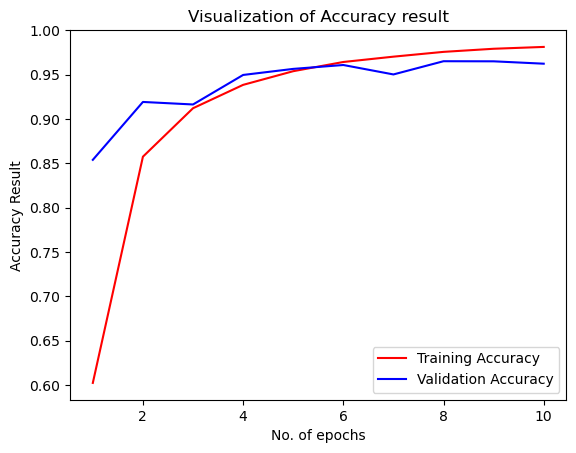

In [79]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy result")
plt.legend()
plt.show()

In [141]:
class_name = validation_set.class_names
class_name 

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [83]:
test_set = tf.keras.utils.image_dataset_from_directory(
...     'valid',
...     labels="inferred",
...     label_mode="categorical",
...     class_names=None,
...     color_mode="rgb",
...     batch_size=32,
...     image_size=(128, 128),
...     shuffle=False,
...     seed=None,
...     validation_split=None,
...     subset=None,
...     interpolation="bilinear",
...     follow_links=False,
...     crop_to_aspect_ratio=False,
...     pad_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [84]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 261s 473ms/step


(array([[9.9582797e-01, 4.9445348e-06, 7.9305573e-10, ..., 1.8532365e-12,
         1.3265475e-11, 3.3559586e-11],
        [1.0000000e+00, 5.1381477e-10, 7.7739769e-14, ..., 7.1662684e-19,
         6.5643461e-15, 5.8605389e-16],
        [1.0000000e+00, 1.3234168e-10, 3.6099861e-13, ..., 1.5402376e-18,
         4.1744464e-15, 1.0735974e-14],
        ...,
        [5.5996058e-11, 4.0913653e-14, 9.1329067e-10, ..., 2.9741893e-11,
         2.2993858e-10, 9.9999785e-01],
        [3.2230582e-10, 4.9068951e-14, 2.3860539e-10, ..., 2.2083212e-11,
         1.7495167e-11, 9.9999988e-01],
        [2.8322974e-13, 1.5035755e-14, 1.3634595e-11, ..., 1.1062819e-11,
         2.2078274e-10, 9.9997222e-01]], dtype=float32),
 (17572, 38))

In [85]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [86]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [87]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [88]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.94      0.95       504
                                 Apple___Black_rot       0.92      1.00      0.96       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.99      0.93      0.96       502
                               Blueberry___healthy       0.96      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.82      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [98]:
loaded_model = load_model('trained_model.h5')

In [67]:
from tensorflow.keras.models import load_model


In [94]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[474,  11,   0, ...,   0,   1,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  2,   2, 427, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   1, ...,   0,   0, 371]], dtype=int64)

In [96]:
## Confusion Matrix Visualization

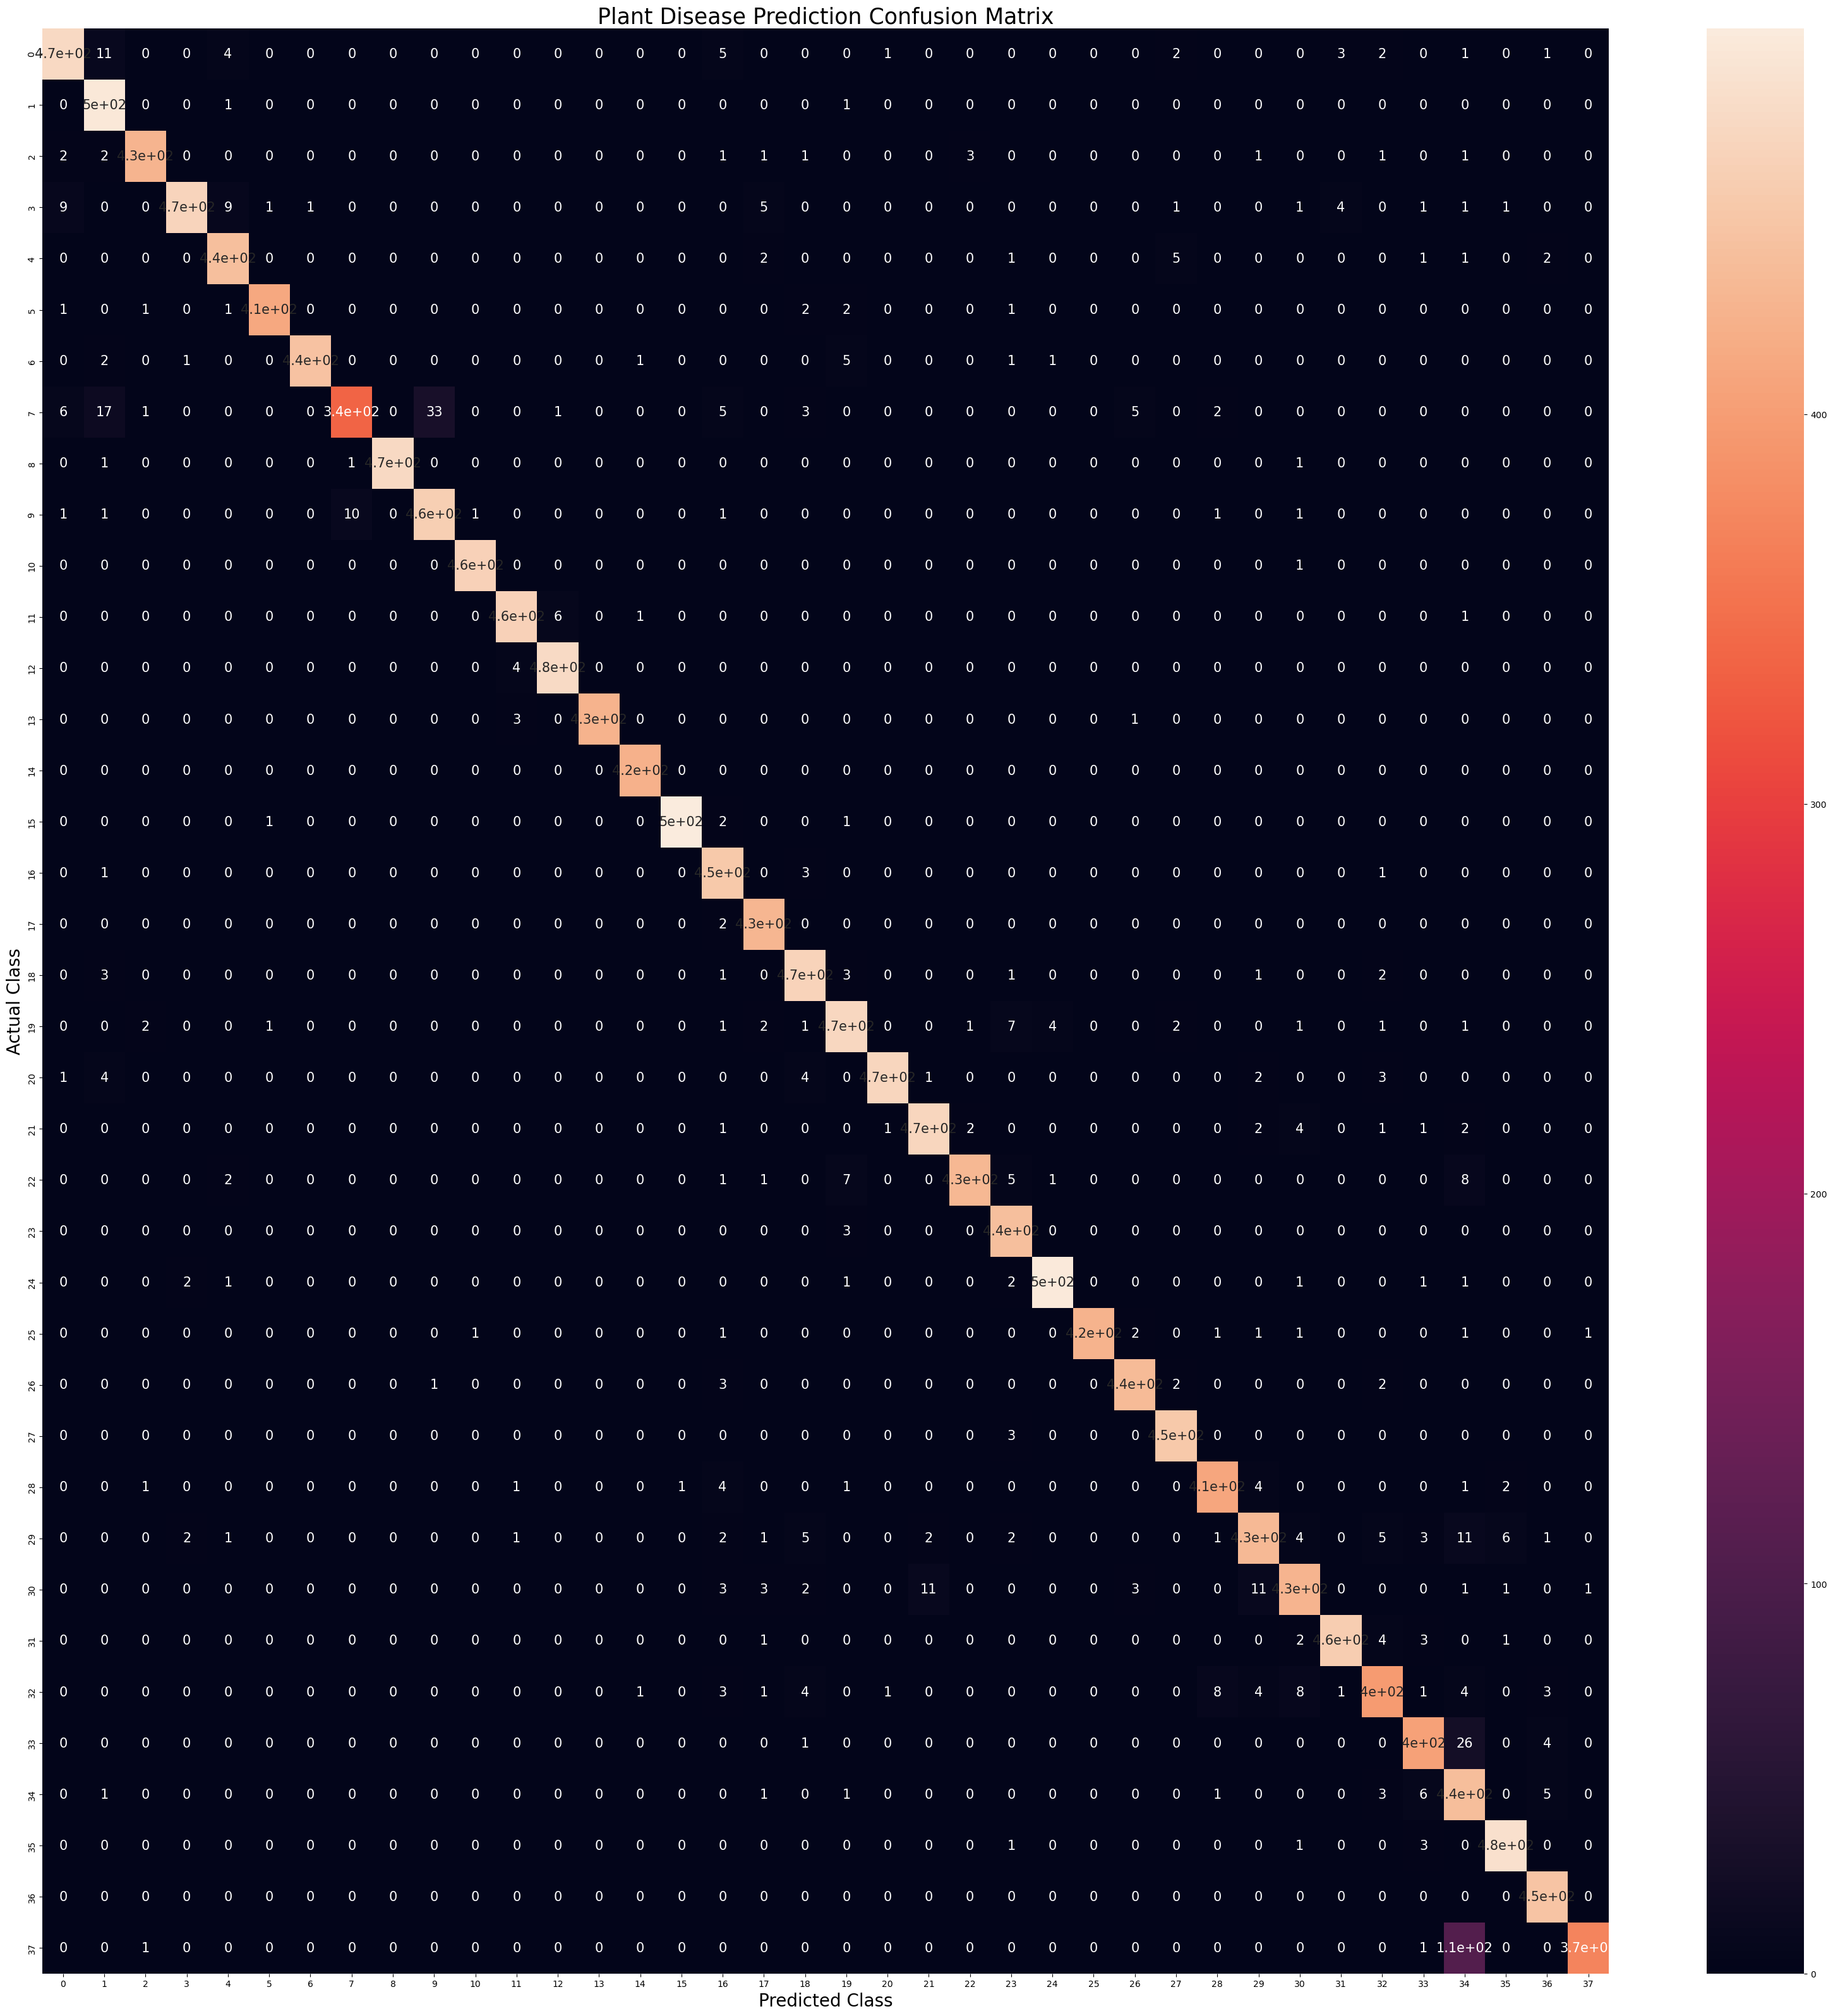

In [95]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True,annot_kws={'size':15})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()

# Test_plant_disease

In [98]:
import numpy as np
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [99]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

 ### Visualizing single image of test set

In [112]:
!pip install opencv-python

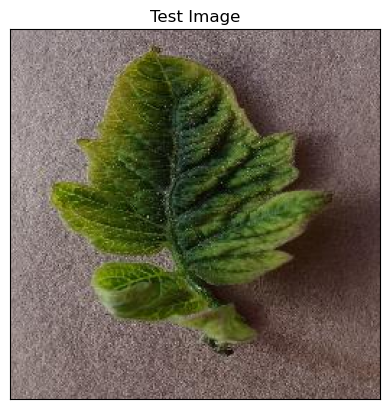

In [149]:
import cv2
image_path = "test/test/TomatoYellowCurlVirus1.JPG"
#Reading image
img = cv2.imread(image_path)
#Converting BGR image to RGB format
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#Displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [151]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Converting single image to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [153]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


(array([[1.5407414e-13, 1.1644492e-12, 1.8637834e-11, 4.0776666e-12,
         2.2977787e-13, 7.1486740e-11, 2.2841692e-15, 1.6904997e-12,
         5.6971853e-17, 4.3441158e-12, 1.5387925e-15, 6.8775367e-12,
         6.1052885e-10, 2.1961357e-08, 1.0474432e-12, 7.8259711e-11,
         7.4284306e-10, 5.7523051e-13, 6.6885724e-07, 5.6370902e-12,
         2.4449720e-15, 7.1035693e-09, 2.1894682e-12, 1.1303891e-07,
         7.4297417e-12, 2.3518224e-11, 1.7821503e-06, 1.6727325e-10,
         7.1166832e-09, 3.8292316e-07, 1.9397442e-11, 3.2742642e-10,
         8.2210805e-10, 3.0728628e-05, 5.5884644e-05, 9.9991047e-01,
         2.2946343e-09, 1.3103259e-10]], dtype=float32),
 (1, 38))

In [155]:
result_index = np.argmax(prediction)
result_index

35

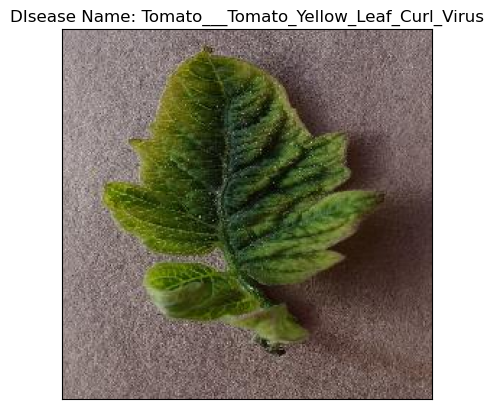

In [157]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"DIsease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [159]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'